In [307]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
wikipedia_link='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

# import k-means for clustering stage
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## Import data and preprocessing

In [308]:
sensors = pd.read_csv('C:\\Users\Jakubina\Desktop\krakow air\sensor_locations.csv',   engine='python')
sensors.head()

,id,latitude,longitude,zone
0,3,50.057748,19.961375,NaN
1,140,50.057747,19.961374,old town
2,142,50.084816,19.878066,NaN
3,147,50.048924,19.962262,NaN
4,169,50.048699,20.101569,EN


In [309]:
december = pd.read_csv('C:\\Users\Jakubina\Desktop\krakow air\december-2017.csv')
december.head(10)

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10,147_temperature,147_humidity,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,171_pm1,171_pm25,171_pm10,172_temperature,172_humidity,172_pressure,172_pm1,172_pm25,172_pm10,173_temperature,173_humidity,173_pressure,173_pm1,173_pm25,173_pm10,174_temperature,174_humidity,174_pressure,174_pm1,174_pm25,174_pm10,176_temperature,176_humidity,176_pressure,176_pm1,176_pm25,176_pm10,177_temperature,177_humidity,177_pressure,177_pm1,177_pm25,177_pm10,178_temperature,178_humidity,178_pressure,178_pm1,178_pm25,178_pm10,179_temperature,179_humidity,179_pressure,179_pm1,179_pm25,179_pm10,180_temperature,180_humidity,180_pressure,180_pm1,180_pm25,180_pm10,181_temperature,181_humidity,181_pressure,181_pm1,181_pm25,181_pm10,182_temperature,182_humidity,182_pressure,182_pm1,182_pm25,182_pm10,183_temperature,183_humidity,183_pressure,183_pm1,183_pm25,183_pm10,184_temperature,184_humidity,184_pressure,184_pm1,184_pm25,184_pm10,185_temperature,185_humidity,185_pressure,185_pm1,185_pm25,185_pm10,187_temperature,187_humidity,187_pressure,187_pm1,187_pm25,187_pm10,189_temperature,189_humidity,189_pressure,189_pm1,189_pm25,189_pm10,192_temperature,192_humidity,192_pressure,192_pm1,192_pm25,192_pm10,194_temperature,194_humidity,194_pressure,194_pm1,194_pm25,194_pm10,195_temperature,195_humidity,195_pressure,195_pm1,195_pm25,195_pm10,196_temperature,196_humidity,196_pressure,196_pm1,196_pm25,196_pm10,201_temperature,201_humidity,201_pressure,201_pm1,201_pm25,201_pm10,202_temperature,202_humidity,202_pressure,202_pm1,202_pm25,202_pm10,203_temperature,203_humidity,203_pressure,203_pm1,203_pm25,203_pm10,204_temperature,204_humidity,204_pressure,204_pm1,204_pm25,204_pm10,205_temperature,205_humidity,205_pressure,205_pm1,205_pm25,205_pm10,208_temperature,208_humidity,208_pressure,208_pm1,208_pm25,208_pm10,209_temperature,209_humidity,209_pressure,209_pm1,209_pm25,209_pm10,210_temperature,210_humidity,210_pressure,210_pm1,210_pm25,210_pm10,211_temperature,211_humidity,211_pressure,211_pm1,211_pm25,211_pm10,212_temperature,212_humidity,212_pressure,212_pm1,212_pm25,212_pm10,213_temperature,213_humidity,213_pressure,213_pm1,213_pm25,213_pm10,214_temperature,214_humidity,214_pressure,214_pm1,214_pm25,214_pm10,215_temperature,215_humidity,215_pressure,215_pm1,215_pm25,215_pm10,216_temperature,216_humidity,216_pressure,216_pm1,216_pm25,216_pm10,218_temperature,218_humidity,218_pressure,218_pm1,218_pm25,218_pm10,219_temperature,219_humidity,219_pressure,219_pm1,219_pm25,219_pm10,220_temperature,220_humidity,220_pressure,220_pm1,220_pm25,220_pm10,221_temperature,221_humidity,221_pressure,221_pm1,221_pm25,221_pm10,222_temperature,222_humidity,222_pressure,222_pm1,222_pm25,222_pm10,223_temperature,223_humidity,223_pressure,223_pm1,223_pm25,223_pm10,225_temperature,225_humidity,225_pressure,225_pm1,225_pm25,225_pm10,226_temperature,226_humidity,226_pressure,226_pm1,226_pm25,226_pm10,227_temperature,227_humidity,227_pressure,227_pm1,227_pm25,227_pm10,228_temperature,228_humidity,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10,622_temperature,622_humidity,622_pressure,622_pm1,622_pm25,622_pm10,713_temperature,713_humidity,713_pressure,713_pm1,713_pm25,713_pm10,808_temperature,808_humidity,808_pressure,808_pm1,808_pm25,808_pm10,857_temperature,857_humidity,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-12-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0,96,100542,39,38,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.0,70.0,100479.0,25.0,23.0,40.0,0.0,72.0,100527.0,29.0,28.0,48.0,0,96,100531

In [310]:
july = pd.read_csv('C:\\Users\Jakubina\Desktop\krakow air\july-2017.csv')
july.head(10)

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10,147_temperature,147_humidity,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,171_pm1,171_pm25,171_pm10,172_temperature,172_humidity,172_pressure,172_pm1,172_pm25,172_pm10,173_temperature,173_humidity,173_pressure,173_pm1,173_pm25,173_pm10,174_temperature,174_humidity,174_pressure,174_pm1,174_pm25,174_pm10,176_temperature,176_humidity,176_pressure,176_pm1,176_pm25,176_pm10,177_temperature,177_humidity,177_pressure,177_pm1,177_pm25,177_pm10,178_temperature,178_humidity,178_pressure,178_pm1,178_pm25,178_pm10,179_temperature,179_humidity,179_pressure,179_pm1,179_pm25,179_pm10,180_temperature,180_humidity,180_pressure,180_pm1,180_pm25,180_pm10,181_temperature,181_humidity,181_pressure,181_pm1,181_pm25,181_pm10,182_temperature,182_humidity,182_pressure,182_pm1,182_pm25,182_pm10,183_temperature,183_humidity,183_pressure,183_pm1,183_pm25,183_pm10,184_temperature,184_humidity,184_pressure,184_pm1,184_pm25,184_pm10,185_temperature,185_humidity,185_pressure,185_pm1,185_pm25,185_pm10,187_temperature,187_humidity,187_pressure,187_pm1,187_pm25,187_pm10,189_temperature,189_humidity,189_pressure,189_pm1,189_pm25,189_pm10,192_temperature,192_humidity,192_pressure,192_pm1,192_pm25,192_pm10,194_temperature,194_humidity,194_pressure,194_pm1,194_pm25,194_pm10,195_temperature,195_humidity,195_pressure,195_pm1,195_pm25,195_pm10,196_temperature,196_humidity,196_pressure,196_pm1,196_pm25,196_pm10,201_temperature,201_humidity,201_pressure,201_pm1,201_pm25,201_pm10,202_temperature,202_humidity,202_pressure,202_pm1,202_pm25,202_pm10,203_temperature,203_humidity,203_pressure,203_pm1,203_pm25,203_pm10,204_temperature,204_humidity,204_pressure,204_pm1,204_pm25,204_pm10,205_temperature,205_humidity,205_pressure,205_pm1,205_pm25,205_pm10,208_temperature,208_humidity,208_pressure,208_pm1,208_pm25,208_pm10,209_temperature,209_humidity,209_pressure,209_pm1,209_pm25,209_pm10,210_temperature,210_humidity,210_pressure,210_pm1,210_pm25,210_pm10,211_temperature,211_humidity,211_pressure,211_pm1,211_pm25,211_pm10,212_temperature,212_humidity,212_pressure,212_pm1,212_pm25,212_pm10,213_temperature,213_humidity,213_pressure,213_pm1,213_pm25,213_pm10,214_temperature,214_humidity,214_pressure,214_pm1,214_pm25,214_pm10,215_temperature,215_humidity,215_pressure,215_pm1,215_pm25,215_pm10,216_temperature,216_humidity,216_pressure,216_pm1,216_pm25,216_pm10,218_temperature,218_humidity,218_pressure,218_pm1,218_pm25,218_pm10,219_temperature,219_humidity,219_pressure,219_pm1,219_pm25,219_pm10,220_temperature,220_humidity,220_pressure,220_pm1,220_pm25,220_pm10,221_temperature,221_humidity,221_pressure,221_pm1,221_pm25,221_pm10,222_temperature,222_humidity,222_pressure,222_pm1,222_pm25,222_pm10,223_temperature,223_humidity,223_pressure,223_pm1,223_pm25,223_pm10,225_temperature,225_humidity,225_pressure,225_pm1,225_pm25,225_pm10,226_temperature,226_humidity,226_pressure,226_pm1,226_pm25,226_pm10,227_temperature,227_humidity,227_pressure,227_pm1,227_pm25,227_pm10,228_temperature,228_humidity,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10,622_temperature,622_humidity,622_pressure,622_pm1,622_pm25,622_pm10,713_temperature,713_humidity,713_pressure,713_pm1,713_pm25,713_pm10,808_temperature,808_humidity,808_pressure,808_pm1,808_pm25,808_pm10,857_temperature,857_humidity,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-07-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,14.0,88.0,100825,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100755,2,2,3,15,85,100766,2.0,2,3,14,77,100780,1,1,2,14,88,100793,3,2,3,NaN,NaN,100782.0,2.0,

### Remove Nan values (all columns)

In [311]:
#december.dropna(axis=1,  inplace=True)
#december.head()

### Choosing just 1 hour observation

In [312]:
df1=december[december['UTC time']=='2017-12-01T19:00:00']
df1.head()

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10,147_temperature,147_humidity,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,171_pm1,171_pm25,171_pm10,172_temperature,172_humidity,172_pressure,172_pm1,172_pm25,172_pm10,173_temperature,173_humidity,173_pressure,173_pm1,173_pm25,173_pm10,174_temperature,174_humidity,174_pressure,174_pm1,174_pm25,174_pm10,176_temperature,176_humidity,176_pressure,176_pm1,176_pm25,176_pm10,177_temperature,177_humidity,177_pressure,177_pm1,177_pm25,177_pm10,178_temperature,178_humidity,178_pressure,178_pm1,178_pm25,178_pm10,179_temperature,179_humidity,179_pressure,179_pm1,179_pm25,179_pm10,180_temperature,180_humidity,180_pressure,180_pm1,180_pm25,180_pm10,181_temperature,181_humidity,181_pressure,181_pm1,181_pm25,181_pm10,182_temperature,182_humidity,182_pressure,182_pm1,182_pm25,182_pm10,183_temperature,183_humidity,183_pressure,183_pm1,183_pm25,183_pm10,184_temperature,184_humidity,184_pressure,184_pm1,184_pm25,184_pm10,185_temperature,185_humidity,185_pressure,185_pm1,185_pm25,185_pm10,187_temperature,187_humidity,187_pressure,187_pm1,187_pm25,187_pm10,189_temperature,189_humidity,189_pressure,189_pm1,189_pm25,189_pm10,192_temperature,192_humidity,192_pressure,192_pm1,192_pm25,192_pm10,194_temperature,194_humidity,194_pressure,194_pm1,194_pm25,194_pm10,195_temperature,195_humidity,195_pressure,195_pm1,195_pm25,195_pm10,196_temperature,196_humidity,196_pressure,196_pm1,196_pm25,196_pm10,201_temperature,201_humidity,201_pressure,201_pm1,201_pm25,201_pm10,202_temperature,202_humidity,202_pressure,202_pm1,202_pm25,202_pm10,203_temperature,203_humidity,203_pressure,203_pm1,203_pm25,203_pm10,204_temperature,204_humidity,204_pressure,204_pm1,204_pm25,204_pm10,205_temperature,205_humidity,205_pressure,205_pm1,205_pm25,205_pm10,208_temperature,208_humidity,208_pressure,208_pm1,208_pm25,208_pm10,209_temperature,209_humidity,209_pressure,209_pm1,209_pm25,209_pm10,210_temperature,210_humidity,210_pressure,210_pm1,210_pm25,210_pm10,211_temperature,211_humidity,211_pressure,211_pm1,211_pm25,211_pm10,212_temperature,212_humidity,212_pressure,212_pm1,212_pm25,212_pm10,213_temperature,213_humidity,213_pressure,213_pm1,213_pm25,213_pm10,214_temperature,214_humidity,214_pressure,214_pm1,214_pm25,214_pm10,215_temperature,215_humidity,215_pressure,215_pm1,215_pm25,215_pm10,216_temperature,216_humidity,216_pressure,216_pm1,216_pm25,216_pm10,218_temperature,218_humidity,218_pressure,218_pm1,218_pm25,218_pm10,219_temperature,219_humidity,219_pressure,219_pm1,219_pm25,219_pm10,220_temperature,220_humidity,220_pressure,220_pm1,220_pm25,220_pm10,221_temperature,221_humidity,221_pressure,221_pm1,221_pm25,221_pm10,222_temperature,222_humidity,222_pressure,222_pm1,222_pm25,222_pm10,223_temperature,223_humidity,223_pressure,223_pm1,223_pm25,223_pm10,225_temperature,225_humidity,225_pressure,225_pm1,225_pm25,225_pm10,226_temperature,226_humidity,226_pressure,226_pm1,226_pm25,226_pm10,227_temperature,227_humidity,227_pressure,227_pm1,227_pm25,227_pm10,228_temperature,228_humidity,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10,622_temperature,622_humidity,622_pressure,622_pm1,622_pm25,622_pm10,713_temperature,713_humidity,713_pressure,713_pm1,713_pm25,713_pm10,808_temperature,808_humidity,808_pressure,808_pm1,808_pm25,808_pm10,857_temperature,857_humidity,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
19,2017-12-01T19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-2,97,101819,99,100,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.0,72.0,101787.0,62.0,63.0,88.0,-2.0,72.0,101807.0,95.0,101.0,138.0,-2,9

In [313]:
dfj1=july[july['UTC time']=='2017-07-01T19:00:00']
dfj1.head()

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10,147_temperature,147_humidity,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,171_pm1,171_pm25,171_pm10,172_temperature,172_humidity,172_pressure,172_pm1,172_pm25,172_pm10,173_temperature,173_humidity,173_pressure,173_pm1,173_pm25,173_pm10,174_temperature,174_humidity,174_pressure,174_pm1,174_pm25,174_pm10,176_temperature,176_humidity,176_pressure,176_pm1,176_pm25,176_pm10,177_temperature,177_humidity,177_pressure,177_pm1,177_pm25,177_pm10,178_temperature,178_humidity,178_pressure,178_pm1,178_pm25,178_pm10,179_temperature,179_humidity,179_pressure,179_pm1,179_pm25,179_pm10,180_temperature,180_humidity,180_pressure,180_pm1,180_pm25,180_pm10,181_temperature,181_humidity,181_pressure,181_pm1,181_pm25,181_pm10,182_temperature,182_humidity,182_pressure,182_pm1,182_pm25,182_pm10,183_temperature,183_humidity,183_pressure,183_pm1,183_pm25,183_pm10,184_temperature,184_humidity,184_pressure,184_pm1,184_pm25,184_pm10,185_temperature,185_humidity,185_pressure,185_pm1,185_pm25,185_pm10,187_temperature,187_humidity,187_pressure,187_pm1,187_pm25,187_pm10,189_temperature,189_humidity,189_pressure,189_pm1,189_pm25,189_pm10,192_temperature,192_humidity,192_pressure,192_pm1,192_pm25,192_pm10,194_temperature,194_humidity,194_pressure,194_pm1,194_pm25,194_pm10,195_temperature,195_humidity,195_pressure,195_pm1,195_pm25,195_pm10,196_temperature,196_humidity,196_pressure,196_pm1,196_pm25,196_pm10,201_temperature,201_humidity,201_pressure,201_pm1,201_pm25,201_pm10,202_temperature,202_humidity,202_pressure,202_pm1,202_pm25,202_pm10,203_temperature,203_humidity,203_pressure,203_pm1,203_pm25,203_pm10,204_temperature,204_humidity,204_pressure,204_pm1,204_pm25,204_pm10,205_temperature,205_humidity,205_pressure,205_pm1,205_pm25,205_pm10,208_temperature,208_humidity,208_pressure,208_pm1,208_pm25,208_pm10,209_temperature,209_humidity,209_pressure,209_pm1,209_pm25,209_pm10,210_temperature,210_humidity,210_pressure,210_pm1,210_pm25,210_pm10,211_temperature,211_humidity,211_pressure,211_pm1,211_pm25,211_pm10,212_temperature,212_humidity,212_pressure,212_pm1,212_pm25,212_pm10,213_temperature,213_humidity,213_pressure,213_pm1,213_pm25,213_pm10,214_temperature,214_humidity,214_pressure,214_pm1,214_pm25,214_pm10,215_temperature,215_humidity,215_pressure,215_pm1,215_pm25,215_pm10,216_temperature,216_humidity,216_pressure,216_pm1,216_pm25,216_pm10,218_temperature,218_humidity,218_pressure,218_pm1,218_pm25,218_pm10,219_temperature,219_humidity,219_pressure,219_pm1,219_pm25,219_pm10,220_temperature,220_humidity,220_pressure,220_pm1,220_pm25,220_pm10,221_temperature,221_humidity,221_pressure,221_pm1,221_pm25,221_pm10,222_temperature,222_humidity,222_pressure,222_pm1,222_pm25,222_pm10,223_temperature,223_humidity,223_pressure,223_pm1,223_pm25,223_pm10,225_temperature,225_humidity,225_pressure,225_pm1,225_pm25,225_pm10,226_temperature,226_humidity,226_pressure,226_pm1,226_pm25,226_pm10,227_temperature,227_humidity,227_pressure,227_pm1,227_pm25,227_pm10,228_temperature,228_humidity,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10,622_temperature,622_humidity,622_pressure,622_pm1,622_pm25,622_pm10,713_temperature,713_humidity,713_pressure,713_pm1,713_pm25,713_pm10,808_temperature,808_humidity,808_pressure,808_pm1,808_pm25,808_pm10,857_temperature,857_humidity,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
19,2017-07-01T19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101065,4,3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100990,4,3,5,17,63,100998,4.0,3,5,17,53,101012,4,3,5,17,64,101017,2,2,3,NaN,NaN,101006.0,4.0,4

### choosing pm2.5 parameters

In [314]:
df2 = df1.filter(regex='_pm25') 
df2.head()

,3_pm25,140_pm25,142_pm25,147_pm25,169_pm25,170_pm25,171_pm25,172_pm25,173_pm25,174_pm25,176_pm25,177_pm25,178_pm25,179_pm25,180_pm25,181_pm25,182_pm25,183_pm25,184_pm25,185_pm25,187_pm25,189_pm25,192_pm25,194_pm25,195_pm25,196_pm25,201_pm25,202_pm25,203_pm25,204_pm25,205_pm25,208_pm25,209_pm25,210_pm25,211_pm25,212_pm25,213_pm25,214_pm25,215_pm25,216_pm25,218_pm25,219_pm25,220_pm25,221_pm25,222_pm25,223_pm25,225_pm25,226_pm25,227_pm25,228_pm25,263_pm25,622_pm25,713_pm25,808_pm25,857_pm25,895_pm25
19,NaN,100,NaN,NaN,63.0,101.0,84,NaN,76,98.0,74,124.0,NaN,73.0,62,107,73,96.0,91,104.0,NaN,83.0,99,78.0,67.0,73.0,90,108,78.0,94.0,NaN,98,97.0,65,NaN,77,NaN,86.0,57.0,103.0,118,113.0,80.0,71.0,145,98,107,85,NaN,83.0,NaN,106,25.0,148.0,104,115


In [315]:
dfj2 = dfj1.filter(regex='_pm25') 
dfj2.head()

,3_pm25,140_pm25,142_pm25,147_pm25,169_pm25,170_pm25,171_pm25,172_pm25,173_pm25,174_pm25,176_pm25,177_pm25,178_pm25,179_pm25,180_pm25,181_pm25,182_pm25,183_pm25,184_pm25,185_pm25,187_pm25,189_pm25,192_pm25,194_pm25,195_pm25,196_pm25,201_pm25,202_pm25,203_pm25,204_pm25,205_pm25,208_pm25,209_pm25,210_pm25,211_pm25,212_pm25,213_pm25,214_pm25,215_pm25,216_pm25,218_pm25,219_pm25,220_pm25,221_pm25,222_pm25,223_pm25,225_pm25,226_pm25,227_pm25,228_pm25,263_pm25,622_pm25,713_pm25,808_pm25,857_pm25,895_pm25
19,NaN,3,NaN,3,3,3,2,4.0,3,3,4,13.0,NaN,2,4,5.0,6.0,3,2.0,4.0,NaN,3.0,2.0,6.0,2.0,3.0,NaN,4,2.0,16,NaN,4,2,3.0,NaN,3,3.0,3,2,NaN,7.0,4.0,4,1,2.0,6,3.0,4,NaN,6.0,6,12.0,4.0,NaN,NaN,3


In [316]:
df=df2.T
df.head()

,19
3_pm25,NaN
140_pm25,100.0
142_pm25,NaN
147_pm25,NaN
169_pm25,63.0


In [317]:
dfj=dfj2.T
dfj.head()

,19
3_pm25,NaN
140_pm25,3.0
142_pm25,NaN
147_pm25,3.0
169_pm25,3.0


### choosing pm10 parameters

In [318]:
df3 = df1.filter(regex='_pm10')
df4=df3.T
df4.head()

,19
3_pm10,NaN
140_pm10,151.0
142_pm10,NaN
147_pm10,NaN
169_pm10,88.0


In [319]:
dfj3 = dfj1.filter(regex='_pm10')
dfj4=dfj3.T
dfj4.head()

,19
3_pm10,NaN
140_pm10,5.0
142_pm10,NaN
147_pm10,5.0
169_pm10,5.0


### adding pm2.5 and pm10 to sensors dataframe 

In [320]:
sensors.head()

,id,latitude,longitude,zone
0,3,50.057748,19.961375,NaN
1,140,50.057747,19.961374,old town
2,142,50.084816,19.878066,NaN
3,147,50.048924,19.962262,NaN
4,169,50.048699,20.101569,EN


In [321]:
df.columns = ['pm25_dec']
df.head()

,pm25_dec
3_pm25,NaN
140_pm25,100.0
142_pm25,NaN
147_pm25,NaN
169_pm25,63.0


In [322]:
dfj.columns = ['pm25_jul']
dfj.head()

,pm25_jul
3_pm25,NaN
140_pm25,3.0
142_pm25,NaN
147_pm25,3.0
169_pm25,3.0


In [323]:
df4.columns = ['pm10_dec']
df4.head()

,pm10_dec
3_pm10,NaN
140_pm10,151.0
142_pm10,NaN
147_pm10,NaN
169_pm10,88.0


In [324]:
dfj4.columns = ['pm10_jul']
dfj4.head()

,pm10_jul
3_pm10,NaN
140_pm10,5.0
142_pm10,NaN
147_pm10,5.0
169_pm10,5.0


In [325]:
sensors.index=df.index
sensors['pm25_dec']=df['pm25_dec']
sensors.head()
#sensors.add(df, axis='pm25',  fill_value=float())

,id,latitude,longitude,zone,pm25_dec
3_pm25,3,50.057748,19.961375,NaN,NaN
140_pm25,140,50.057747,19.961374,old town,100.0
142_pm25,142,50.084816,19.878066,NaN,NaN
147_pm25,147,50.048924,19.962262,NaN,NaN
169_pm25,169,50.048699,20.101569,EN,63.0


In [326]:
sensors.index=dfj.index
sensors['pm25_jul']=dfj['pm25_jul']
sensors.head()

,id,latitude,longitude,zone,pm25_dec,pm25_jul
3_pm25,3,50.057748,19.961375,NaN,NaN,NaN
140_pm25,140,50.057747,19.961374,old town,100.0,3.0
142_pm25,142,50.084816,19.878066,NaN,NaN,NaN
147_pm25,147,50.048924,19.962262,NaN,NaN,3.0
169_pm25,169,50.048699,20.101569,EN,63.0,3.0


In [327]:
sensors.index=df4.index
sensors['pm10_dec']=df4['pm10_dec']
sensors.head()


,id,latitude,longitude,zone,pm25_dec,pm25_jul,pm10_dec
3_pm10,3,50.057748,19.961375,NaN,NaN,NaN,NaN
140_pm10,140,50.057747,19.961374,old town,100.0,3.0,151.0
142_pm10,142,50.084816,19.878066,NaN,NaN,NaN,NaN
147_pm10,147,50.048924,19.962262,NaN,NaN,3.0,NaN
169_pm10,169,50.048699,20.101569,EN,63.0,3.0,88.0


In [328]:
sensors.index=dfj4.index
sensors['pm10_jul']=dfj4['pm10_jul']
sensors.head(56)


,id,latitude,longitude,zone,pm25_dec,pm25_jul,pm10_dec,pm10_jul
3_pm10,3,50.057748,19.961375,NaN,NaN,NaN,NaN,NaN
140_pm10,140,50.057747,19.961374,old town,100.0,3.0,151.0,5.0
142_pm10,142,50.084816,19.878066,NaN,NaN,NaN,NaN,NaN
147_pm10,147,50.048924,19.962262,NaN,NaN,3.0,NaN,5.0
169_pm10,169,50.048699,20.101569,EN,63.0,3.0,88.0,5.0
170_pm10,170,50.077467,19.895577,WN,101.0,3.0,138.0,5.0
171_pm10,171,50.084134,19.968416,EN,84.0,2.0,117.0,3.0
172_pm10,172,50.073094,19.886750,NaN,NaN,4.0,NaN,6.0
173_pm10,173,50.057537,19.897547,WN,76.0,3.0,108.0,5.0
174_pm10,174,50.057242,19.914874,WN,98.0,3.0,137.0,6.0


In [329]:
sensors.shape

(56, 8)

### removing NaN values

In [330]:
sensors.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
sensors.head(100)

,id,latitude,longitude,zone,pm25_dec,pm25_jul,pm10_dec,pm10_jul
140_pm10,140,50.057747,19.961374,old town,100.0,3.0,151.0,5.0
169_pm10,169,50.048699,20.101569,EN,63.0,3.0,88.0,5.0
170_pm10,170,50.077467,19.895577,WN,101.0,3.0,138.0,5.0
171_pm10,171,50.084134,19.968416,EN,84.0,2.0,117.0,3.0
173_pm10,173,50.057537,19.897547,WN,76.0,3.0,108.0,5.0
174_pm10,174,50.057242,19.914874,WN,98.0,3.0,137.0,6.0
176_pm10,176,50.044067,19.998804,ES,74.0,4.0,115.0,7.0
177_pm10,177,50.093619,19.924138,WN,124.0,13.0,168.0,20.0
179_pm10,179,50.077690,19.935777,WN,73.0,2.0,108.0,4.0
180_pm10,180,50.018006,19.983935,ES,62.0,4.0,94.0,8.0


In [331]:
sensors.shape

(41, 8)

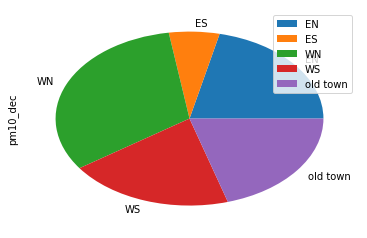

In [332]:
#counting number of sensors in each zone
sensors_group=sensors.groupby('zone', axis=0).sum()
sensors_group.plot(kind='pie', x='zone', y='pm10_dec')
plt.show()

In [333]:
pollution = sensors[['zone', 'pm25_dec', 'pm25_jul', 'pm10_dec', 'pm10_jul']]
pollution.head()

,zone,pm25_dec,pm25_jul,pm10_dec,pm10_jul
140_pm10,old town,100.0,3.0,151.0,5.0
169_pm10,EN,63.0,3.0,88.0,5.0
170_pm10,WN,101.0,3.0,138.0,5.0
171_pm10,EN,84.0,2.0,117.0,3.0
173_pm10,WN,76.0,3.0,108.0,5.0


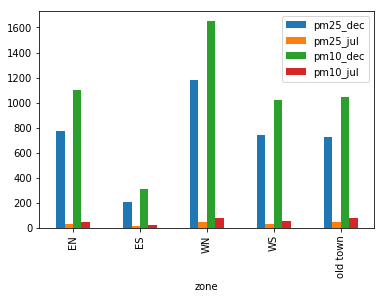

In [334]:
pollution_group=pollution.groupby('zone', axis=0).sum()
pollution_group.plot(kind='bar')
plt.show()

In [335]:
address = 'KRAKOW, KR '

geolocator = Nominatim(user_agent="krakow_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Krakow are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Krakow are 50.0853144, 20.0675614259824.


In [336]:
map_krakow = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for id, lat, lng, zone, pm25_dec, pm25_jul, pm10_dec, pm10_jul in zip(sensors['id'], sensors['latitude'], sensors['longitude'], sensors['zone'], sensors['pm25_dec'], sensors['pm25_jul'], sensors['pm10_dec'], sensors['pm10_jul']):
    label = '{}, {}, {}, {}, {}, {}'.format(id, zone, pm25_dec, pm25_jul, pm10_dec, pm10_jul )
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_krakow)  
    
map_krakow

In [358]:
sensors.ix[3, 'zone']

'EN'

In [338]:
sensors_latitude = sensors.ix[0, 'latitude'] # neighborhood latitude value
sensors_longitude = sensors.ix[0, 'longitude'] # neighborhood longitude value

sensors_name = sensors.ix[0, 'zone'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(sensors_name, 
                                                               sensors_latitude, 
                                                               sensors_longitude))

Latitude and longitude values of old town are 50.057747, 19.961374.


## foursquere credentials

In [339]:
CLIENT_ID = 'UEBGO35ZL4UDZNOPOWD5CVPEACOQNFAXJZ4Z2MIB23JHZBIG' # your Foursquare ID
CLIENT_SECRET = '0AXQ5SDTX1WMIEWLT2XDQ3G14BTYJAZJFZY3WQDS3N5CZUHL' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UEBGO35ZL4UDZNOPOWD5CVPEACOQNFAXJZ4Z2MIB23JHZBIG
CLIENT_SECRET:0AXQ5SDTX1WMIEWLT2XDQ3G14BTYJAZJFZY3WQDS3N5CZUHL


In [340]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    sensors_latitude, 
    sensors_longitude, 
    radius,
    LIMIT)
url



'https://api.foursquare.com/v2/venues/explore?&client_id=UEBGO35ZL4UDZNOPOWD5CVPEACOQNFAXJZ4Z2MIB23JHZBIG&client_secret=0AXQ5SDTX1WMIEWLT2XDQ3G14BTYJAZJFZY3WQDS3N5CZUHL&v=20180604&ll=50.057747,19.961374&radius=500&limit=100'

In [341]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c80069b4c1f67634b825093'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-54e08457498e1183c528279b-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/performingarts_theater_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d137941735',
         'name': 'Theater',
         'pluralName': 'Theaters',
         'primary': True,
         'shortName': 'Theater'}],
       'id': '54e08457498e1183c528279b',
       'location': {'address': 'Grzegórzecka 71',
        'cc': 'PL',
        'city': 'Kraków',
        'country': 'Polska',
        'distance': 198,
        'formattedAddress': ['Grzegórzecka 71', 'Kraków', 'Polska'],
        'labeledLatLngs': [{'label': 'display',
          'lat': 50.0569410045524,
          '

In [342]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [359]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) 

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

,name,categories,lat,lng
0,Teatr VARIÉTÉ,Theater,50.056941,19.963850
1,Mazaya Falafel,Falafel Restaurant,50.057758,19.957761
2,Cukiernia Wadowice,Dessert Shop,50.061523,19.962096
3,Fresh Market,Grocery Store,50.057024,19.959872
4,Burgertata,Burger Joint,50.057212,19.957342
5,Phong Hai,Asian Restaurant,50.056691,19.960892
6,Biedronka,Supermarket,50.057901,19.963213
7,Wavelo - Rondo Grzegorzeckie,Bike Rental / Bike Share,50.057285,19.958921
8,Bistro Antidotum,Bistro,50.057236,19.964487


In [344]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

9 venues were returned by Foursquare.


In [345]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['zone', 
                  'sensors latitude', 
                  'sensors longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [346]:
krakow_venues = getNearbyVenues(names=sensors['zone'],
                                   latitudes=sensors['latitude'],
                                   longitudes=sensors['longitude']
                                  )

old town
EN
WN
EN
WN
WN
ES
WN
WN
ES
old town
ES
WN
WS
WN
old town
WN
EN
EN
old town
WS
EN
old town
EN
WN
EN
WN
old town
EN
WN
EN
old town
EN
WS
WS
WS
WS
WS
old town
WS
WN


In [347]:
print(krakow_venues.shape)
krakow_venues.head(10)

(497, 7)


,zone,sensors latitude,sensors longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,old town,50.057747,19.961374,Teatr VARIÉTÉ,50.056941,19.963850,Theater
1,old town,50.057747,19.961374,Mazaya Falafel,50.057758,19.957761,Falafel Restaurant
2,old town,50.057747,19.961374,Cukiernia Wadowice,50.061523,19.962096,Dessert Shop
3,old town,50.057747,19.961374,Fresh Market,50.057024,19.959872,Grocery Store
4,old town,50.057747,19.961374,Burgertata,50.057212,19.957342,Burger Joint
5,old town,50.057747,19.961374,Phong Hai,50.056691,19.960892,Asian Restaurant
6,old town,50.057747,19.961374,Biedronka,50.057901,19.963213,Supermarket
7,old town,50.057747,19.961374,Wavelo - Rondo Grzegorzeckie,50.057285,19.958921,Bike Rental / Bike Share
8,old town,50.057747,19.961374,Bistro Antidotum,50.057236,19.964487,Bistro
9,WN,50.077467,19.895577,Platinium Fitness Club,50.079403,19.892779,Gym / Fitness Center


## Analyse each zone

In [348]:
# one hot encoding
krakow_hot = pd.get_dummies(krakow_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
krakow_hot['zone'] = krakow_venues['zone'] 

# move neighborhood column to the first column
fixed_columns = [krakow_hot.columns[-1]] + list(krakow_hot.columns[:-1])
krakow_hot = krakow_hot[fixed_columns]

krakow_hot.head()

,zone,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bistro,Bookstore,Breakfast Spot,Buffet,Burger Joint,Bus Station,Bus Stop,Café,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Furniture / Home Store,Gas Station,Gastropub,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Historic Site,History Museum,Hockey Field,Hookah Bar,Hostel,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Juice Bar,Light Rail Station,Liquor Store,Lounge,Market,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Movie Theater,Museum,Nightclub,Noodle House,Opera House,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Polish Restaurant,Pub,Ramen Restaurant,Rest Area,Restaurant,River,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shopping Mall,Skating Rink,Soccer Stadium,Soup Place,Spa,Sporting Goods Shop,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Synagogue,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Train Station,Tram Station,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Waste Facility,Wine Bar,Yoga Studio
0,old town,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,old town,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,old town,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,old town,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,old town,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [349]:
krakow_hot.shape

(497, 137)

In [350]:
krakow_grouped = krakow_hot.groupby('zone').mean().reset_index()
krakow_grouped

,zone,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bistro,Bookstore,Breakfast Spot,Buffet,Burger Joint,Bus Station,Bus Stop,Café,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Furniture / Home Store,Gas Station,Gastropub,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Historic Site,History Museum,Hockey Field,Hookah Bar,Hostel,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Juice Bar,Light Rail Station,Liquor Store,Lounge,Market,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Movie Theater,Museum,Nightclub,Noodle House,Opera House,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Polish Restaurant,Pub,Ramen Restaurant,Rest Area,Restaurant,River,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shopping Mall,Skating Rink,Soccer Stadium,Soup Place,Spa,Sporting Goods Shop,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Synagogue,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Train Station,Tram Station,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Waste Facility,Wine Bar,Yoga Studio
0,EN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017241,0.000000,0.000000,0.034483,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017241,0.000000,0.017241,0.017241,0.017241,0.051724,0.034483,0.034483,0.017241,0.000000,0.000000,0.000000,0.017241,0.000000,0.017241,0.017241,0.017241,0.017241,0.000000,0.000000,0.000000,0.017241,0.000000,0.017241,0.000000,0.000000,0.017241,0.017241,0.00000,0.000000,0.034483,0.000000,0.068966,0.000000,0.000000,0.000000,0.017241,0.017241,0.000000,0.000000,0.017241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017241,0.000000,0.017241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017241,0.000000,0.000000,0.000000,0.000000,0.017241,0.000000,0.000000,0.000000,0.000000,0.017241,0.000000,0.017241,0.000000,0.017241,0.034483,0.017241,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017241,0.000000,0.000000,0.000000,0.000,0.017241,0.017241,0.00000,0.000000,0.051724,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017241,0.000000,0.051724,0.000000,0.000000,0.017241,0.034483,0.000000,0.000000,0.000000
1,ES,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,

In [351]:
krakow_grouped.shape

(5, 137)

In [352]:
num_top_venues = 5

for hood in krakow_grouped['zone']:
    print("----"+hood+"----")
    temp = krakow_grouped[krakow_grouped['zone'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----EN----
               venue  freq
0  Food & Drink Shop  0.07
1       Tram Station  0.05
2        Bus Station  0.05
3        Supermarket  0.05
4             Bakery  0.03


----ES----
           venue  freq
0   Tram Station  0.17
1    Pizza Place  0.17
2         Bakery  0.08
3    Supermarket  0.08
4  Grocery Store  0.08


----WN----
          venue  freq
0  Tram Station  0.06
1          Park  0.05
2    Restaurant  0.05
3   Bus Station  0.05
4         Hotel  0.05


----WS----
                        venue  freq
0                         Spa  0.12
1                Tram Station  0.08
2          Athletics & Sports  0.08
3           Food & Drink Shop  0.08
4  Modern European Restaurant  0.04


----old town----
                venue  freq
0                Café  0.07
1               Hotel  0.06
2          Restaurant  0.05
3  Italian Restaurant  0.05
4   Polish Restaurant  0.05




In [353]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [354]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['zone']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
zone_venues_sorted = pd.DataFrame(columns=columns)
zone_venues_sorted['zone'] = krakow_grouped['zone']

for ind in np.arange(krakow_grouped.shape[0]):
    zone_venues_sorted.iloc[ind, 1:] = return_most_common_venues(krakow_grouped.iloc[ind, :], num_top_venues)

zone_venues_sorted.head(10)

,zone,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,EN,Food & Drink Shop,Bus Station,Supermarket,Tram Station,Bakery,Restaurant,Café,Pizza Place,Bus Stop,Vietnamese Restaurant
1,ES,Pizza Place,Tram Station,Diner,Sporting Goods Shop,Climbing Gym,Grocery Store,Italian Restaurant,Bus Station,Supermarket,Bakery
2,WN,Tram Station,Hotel,Park,Bus Station,Restaurant,Grocery Store,Plaza,Supermarket,Farmers Market,Cosmetics Shop
3,WS,Spa,Athletics & Sports,Food & Drink Shop,Tram Station,Yoga Studio,Modern European Restaurant,Restaurant,Pizza Place,Park,Paper / Office Supplies Store
4,old town,Café,Hotel,Italian Restaurant,Restaurant,Bar,Polish Restaurant,Hostel,Coffee Shop,Plaza,Pub


### Clustering and mapping

In [355]:
# set number of clusters
kclusters = 5

krakow_grouped_clustering = krakow_grouped.drop('zone', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(krakow_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 1, 4, 2, 0])

In [356]:
# add clustering labels
zone_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

krakow_merged = sensors

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
krakow_merged = krakow_merged.join(zone_venues_sorted.set_index('zone'), on='zone')

krakow_merged.head() # check the last columns!

,id,latitude,longitude,zone,pm25_dec,pm25_jul,pm10_dec,pm10_jul,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
140_pm10,140,50.057747,19.961374,old town,100.0,3.0,151.0,5.0,0,Café,Hotel,Italian Restaurant,Restaurant,Bar,Polish Restaurant,Hostel,Coffee Shop,Plaza,Pub
169_pm10,169,50.048699,20.101569,EN,63.0,3.0,88.0,5.0,3,Food & Drink Shop,Bus Station,Supermarket,Tram Station,Bakery,Restaurant,Café,Pizza Place,Bus Stop,Vietnamese Restaurant
170_pm10,170,50.077467,19.895577,WN,101.0,3.0,138.0,5.0,4,Tram Station,Hotel,Park,Bus Station,Restaurant,Grocery Store,Plaza,Supermarket,Farmers Market,Cosmetics Shop
171_pm10,171,50.084134,19.968416,EN,84.0,2.0,117.0,3.0,3,Food & Drink Shop,Bus Station,Supermarket,Tram Station,Bakery,Restaurant,Café,Pizza Place,Bus Stop,Vietnamese Restaurant
173_pm10,173,50.057537,19.897547,WN,76.0,3.0,108.0,5.0,4,Tram Station,Hotel,Park,Bus Station,Restaurant,Grocery Store,Plaza,Supermarket,Farmers Market,Cosmetics Shop


In [357]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(krakow_merged['latitude'], krakow_merged['longitude'], krakow_merged['zone'], krakow_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## examine clusters

In [302]:
krakow_merged.loc[krakow_merged['Cluster Labels'] == 0, krakow_merged.columns[[1] + list(range(5, krakow_merged.shape[1]))]]

,latitude,pm25_jul,pm10_dec,pm10_jul,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
140_pm10,50.057747,3.0,151.0,5.0,0,Café,Hotel,Italian Restaurant,Restaurant,Bar,Polish Restaurant,Hostel,Coffee Shop,Plaza,Pub
181_pm10,50.055163,5.0,148.0,8.0,0,Café,Hotel,Italian Restaurant,Restaurant,Bar,Polish Restaurant,Hostel,Coffee Shop,Plaza,Pub
189_pm10,50.062418,3.0,116.0,4.0,0,Café,Hotel,Italian Restaurant,Restaurant,Bar,Polish Restaurant,Hostel,Coffee Shop,Plaza,Pub
196_pm10,50.066747,3.0,104.0,5.0,0,Café,Hotel,Italian Restaurant,Restaurant,Bar,Polish Restaurant,Hostel,Coffee Shop,Plaza,Pub
204_pm10,50.062006,16.0,129.0,26.0,0,Café,Hotel,Italian Restaurant,Restaurant,Bar,Polish Restaurant,Hostel,Coffee Shop,Plaza,Pub
214_pm10,50.071719,3.0,123.0,5.0,0,Café,Hotel,Italian Restaurant,Restaurant,Bar,Polish Restaurant,Hostel,Coffee Shop,Plaza,Pub
220_pm10,50.079672,4.0,113.0,6.0,0,Café,Hotel,Italian Restaurant,Restaurant,Bar,Polish Restaurant,Hostel,Coffee Shop,Plaza,Pub
622_pm10,50.044418,12.0,162.0,22.0,0,Café,Hotel,Italian Restaurant,Restaurant,Bar,Polish Restaurant,Hostel,Coffee Shop,Plaza,Pub


In [306]:
krakow_merged.loc[krakow_merged['Cluster Labels'] == 1, krakow_merged.columns[[1] + list(range(5, krakow_merged.shape[1]))]]

,latitude,pm25_jul,pm10_dec,pm10_jul,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
176_pm10,50.044067,4.0,115.0,7.0,1,Pizza Place,Tram Station,Diner,Sporting Goods Shop,Climbing Gym,Grocery Store,Italian Restaurant,Bus Station,Supermarket,Bakery
180_pm10,50.018006,4.0,94.0,8.0,1,Pizza Place,Tram Station,Diner,Sporting Goods Shop,Climbing Gym,Grocery Store,Italian Restaurant,Bus Station,Supermarket,Bakery
182_pm10,50.020586,6.0,104.0,9.0,1,Pizza Place,Tram Station,Diner,Sporting Goods Shop,Climbing Gym,Grocery Store,Italian Restaurant,Bus Station,Supermarket,Bakery


In [305]:
krakow_merged.loc[krakow_merged['Cluster Labels'] == 2, krakow_merged.columns[[1] + list(range(5, krakow_merged.shape[1]))]]

,latitude,pm25_jul,pm10_dec,pm10_jul,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
184_pm10,50.047736,2.0,128.0,5.0,2,Spa,Athletics & Sports,Food & Drink Shop,Tram Station,Yoga Studio,Modern European Restaurant,Restaurant,Pizza Place,Park,Paper / Office Supplies Store
202_pm10,50.005587,4.0,146.0,6.0,2,Spa,Athletics & Sports,Food & Drink Shop,Tram Station,Yoga Studio,Modern European Restaurant,Restaurant,Pizza Place,Park,Paper / Office Supplies Store
222_pm10,50.040717,2.0,192.0,4.0,2,Spa,Athletics & Sports,Food & Drink Shop,Tram Station,Yoga Studio,Modern European Restaurant,Restaurant,Pizza Place,Park,Paper / Office Supplies Store
223_pm10,50.025251,6.0,134.0,9.0,2,Spa,Athletics & Sports,Food & Drink Shop,Tram Station,Yoga Studio,Modern European Restaurant,Restaurant,Pizza Place,Park,Paper / Office Supplies Store
225_pm10,50.020756,3.0,142.0,5.0,2,Spa,Athletics & Sports,Food & Drink Shop,Tram Station,Yoga Studio,Modern European Restaurant,Restaurant,Pizza Place,Park,Paper / Office Supplies Store
226_pm10,49.998480,4.0,118.0,7.0,2,Spa,Athletics & Sports,Food & Drink Shop,Tram Station,Yoga Studio,Modern European Restaurant,Restaurant,Pizza Place,Park,Paper / Office Supplies Store
228_pm10,50.013156,6.0,116.0,10.0,2,Spa,Athletics & Sports,Food & Drink Shop,Tram Station,Yoga Studio,Modern European Restaurant,Restaurant,Pizza Place,Park,Paper / Office Supplies Store
713_pm10,50.032902,4.0,49.0,7.0,2,Spa,Athletics & Sports,Food & Drink Shop,Tram Station,Yoga Studio,Modern European Restaurant,Restaurant,Pizza Place,Park,Paper / Office Supplies Store


In [304]:
krakow_merged.loc[krakow_merged['Cluster Labels'] == 3, krakow_merged.columns[[1] + list(range(5, krakow_merged.shape[1]))]]

,latitude,pm25_jul,pm10_dec,pm10_jul,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
169_pm10,50.048699,3.0,88.0,5.0,3,Food & Drink Shop,Bus Station,Supermarket,Tram Station,Bakery,Restaurant,Café,Pizza Place,Bus Stop,Vietnamese Restaurant
171_pm10,50.084134,2.0,117.0,3.0,3,Food & Drink Shop,Bus Station,Supermarket,Tram Station,Bakery,Restaurant,Café,Pizza Place,Bus Stop,Vietnamese Restaurant
194_pm10,50.073167,6.0,108.0,10.0,3,Food & Drink Shop,Bus Station,Supermarket,Tram Station,Bakery,Restaurant,Café,Pizza Place,Bus Stop,Vietnamese Restaurant
195_pm10,50.066686,2.0,98.0,3.0,3,Food & Drink Shop,Bus Station,Supermarket,Tram Station,Bakery,Restaurant,Café,Pizza Place,Bus Stop,Vietnamese Restaurant
203_pm10,50.083454,2.0,112.0,4.0,3,Food & Drink Shop,Bus Station,Supermarket,Tram Station,Bakery,Restaurant,Café,Pizza Place,Bus Stop,Vietnamese Restaurant
208_pm10,50.099239,4.0,135.0,7.0,3,Food & Drink Shop,Bus Station,Supermarket,Tram Station,Bakery,Restaurant,Café,Pizza Place,Bus Stop,Vietnamese Restaurant
210_pm10,50.062677,3.0,94.0,6.0,3,Food & Drink Shop,Bus Station,Supermarket,Tram Station,Bakery,Restaurant,Café,Pizza Place,Bus Stop,Vietnamese Restaurant
215_pm10,50.096693,2.0,89.0,4.0,3,Food & Drink Shop,Bus Station,Supermarket,Tram Station,Bakery,Restaurant,Café,Pizza Place,Bus Stop,Vietnamese Restaurant
219_pm10,50.107347,4.0,156.0,6.0,3,Food & Drink Shop,Bus Station,Supermarket,Tram Station,Bakery,Restaurant,Café,Pizza Place,Bus Stop,Vietnamese Restaurant
221_pm10,50.085346,1.0,101.0,3.0,3,Food & Drink Shop,Bus Station,Supermarket,Tram Station,Bakery,Restaurant,Café,Pizza Place,Bus Stop,Vietnamese Restaurant


In [303]:
krakow_merged.loc[krakow_merged['Cluster Labels'] == 4, krakow_merged.columns[[1] + list(range(5, krakow_merged.shape[1]))]]

,latitude,pm25_jul,pm10_dec,pm10_jul,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
170_pm10,50.077467,3.0,138.0,5.0,4,Tram Station,Hotel,Park,Bus Station,Restaurant,Grocery Store,Plaza,Supermarket,Farmers Market,Cosmetics Shop
173_pm10,50.057537,3.0,108.0,5.0,4,Tram Station,Hotel,Park,Bus Station,Restaurant,Grocery Store,Plaza,Supermarket,Farmers Market,Cosmetics Shop
174_pm10,50.057242,3.0,137.0,6.0,4,Tram Station,Hotel,Park,Bus Station,Restaurant,Grocery Store,Plaza,Supermarket,Farmers Market,Cosmetics Shop
177_pm10,50.093619,13.0,168.0,20.0,4,Tram Station,Hotel,Park,Bus Station,Restaurant,Grocery Store,Plaza,Supermarket,Farmers Market,Cosmetics Shop
179_pm10,50.077690,2.0,108.0,4.0,4,Tram Station,Hotel,Park,Bus Station,Restaurant,Grocery Store,Plaza,Supermarket,Farmers Market,Cosmetics Shop
183_pm10,50.098304,3.0,132.0,6.0,4,Tram Station,Hotel,Park,Bus Station,Restaurant,Grocery Store,Plaza,Supermarket,Farmers Market,Cosmetics Shop
185_pm10,50.085470,4.0,146.0,6.0,4,Tram Station,Hotel,Park,Bus Station,Restaurant,Grocery Store,Plaza,Supermarket,Farmers Market,Cosmetics Shop
192_pm10,50.065128,2.0,136.0,4.0,4,Tram Station,Hotel,Park,Bus Station,Restaurant,Grocery Store,Plaza,Supermarket,Farmers Market,Cosmetics Shop
209_pm10,50.108024,2.0,133.0,4.0,4,Tram Station,Hotel,Park,Bus Station,Restaurant,Grocery Store,Plaza,Supermarket,Farmers Market,Cosmetics Shop
212_pm10,50.055138,3.0,110.0,5.0,4,Tram Station,Hotel,Park,Bus Station,Restaurant,Grocery Store,Plaza,Supermarket,Farmers Market,Cosmetics Shop
